<a href="https://colab.research.google.com/github/GowriShankarAllam/E-commerce-customer-churn-prediction/blob/main/Churn_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing all required libraries.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Loading Dataset(CSV)

In [3]:
df = pd.read_csv('ecommerce_customer_data_custom_ratios.csv')

printing first 5 rows

In [4]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,08-09-2020 09:38,Electronics,12,3,740,Credit Card,37.0,0.0,Christine Hernandez,37.0,Male,0.0
1,46251,05-03-2022 12:56,Home,468,4,2739,PayPal,37.0,0.0,Christine Hernandez,37.0,Male,0.0
2,46251,23-05-2022 18:18,Home,288,2,3196,PayPal,37.0,0.0,Christine Hernandez,37.0,Male,0.0
3,46251,12-11-2020 13:13,Clothing,196,1,3509,PayPal,37.0,0.0,Christine Hernandez,37.0,Male,0.0
4,13593,27-11-2020 17:55,Home,449,1,3452,Credit Card,49.0,0.0,James Grant,49.0,Female,1.0


identifying stasticals measures and averages, ranges, and common patterns.

In [5]:
df.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,219928.000000,219928.000000,219928.000000,219928.000000,219927.000000,177916.000000,219927.000000,219927.000000
mean,25014.847141,254.729571,2.999345,2726.336901,43.940044,0.498696,43.940044,0.199625
std,14422.013380,141.559698,1.414795,1443.090916,15.364749,0.500000,15.364749,0.399720
min,1.000000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.000000
25%,12522.000000,132.000000,2.000000,1477.000000,31.000000,0.000000,31.000000,0.000000
50%,25047.000000,255.000000,3.000000,2726.000000,44.000000,0.000000,44.000000,0.000000
75%,37521.000000,377.000000,4.000000,3975.000000,57.000000,1.000000,57.000000,0.000000
max,49999.000000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.000000


In [6]:
df.describe(include='O')

,Purchase Date,Product Category,Payment Method,Customer Name,Gender
count,219928,219928,219927,219927,219927
unique,207969,4,4,33780,2
top,30-01-2020 11:16,Clothing,Credit Card,John Smith,Female
freq,4,66035,88391,99,110422


To know our dataset is complete and to check whether any null values or any duplicates are present.this is given by info().

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219928 entries, 0 to 219927
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            219928 non-null  int64  
 1   Purchase Date          219928 non-null  object 
 2   Product Category       219928 non-null  object 
 3   Product Price          219928 non-null  int64  
 4   Quantity               219928 non-null  int64  
 5   Total Purchase Amount  219928 non-null  int64  
 6   Payment Method         219927 non-null  object 
 7   Customer Age           219927 non-null  float64
 8   Returns                177916 non-null  float64
 9   Customer Name          219927 non-null  object 
 10  Age                    219927 non-null  float64
 11  Gender                 219927 non-null  object 
 12  Churn                  219927 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 21.8+ MB


Using drop to skip all the duplicated values where ever they are present.

In [8]:
df.drop_duplicates(inplace=True)

Finding the cummulative sum of null values in columns.

In [9]:
missing_values = df.isnull().sum()
print("Missing Values:")
missing_values

Missing Values:


Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               1
Customer Age                 1
Returns                  42012
Customer Name                1
Age                          1
Gender                       1
Churn                        1
dtype: int64

Some customers may not returned some items,to make it clear we are defining it with value 0

In [10]:
default_return_value = 0
df['Returns'].fillna(default_return_value, inplace=True)

df.isnull().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           1
Customer Age             1
Returns                  0
Customer Name            1
Age                      1
Gender                   1
Churn                    1
dtype: int64

 our dataset has some 'Purchase Date,to make it more user-friendly by converting it into a datetime format. we're extracting the year and month from the 'Purchase Date' to help us observe over time patterns

In [11]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Extract year and month from 'Purchase Date'
df['Purchase Year'] = df['Purchase Date'].dt.year
df['Purchase Month'] = df['Purchase Date'].dt.month

Calculating prize of each item i.e summing all the cart items getting purchased.

In [12]:
df['Total Purchase Amount'] = df['Product Price'] * df['Quantity']

In [13]:
# df.drop(['Customer Name'], axis=1, inplace=True)
# df.drop(['Age'], axis=1, inplace=True)

# df.head(10)

In [ ]:
#df.to_csv('cleaned_ecommerce_data.csv', index=False)

In [ ]:
#df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

In [ ]:
#df.info()

In [ ]:
#df.describe()

In [14]:
#df.describe(include='O')

Dividing customers into age groups, creating bins from 0 to 10, 11 to 20, 21 to 30, 31 to 40, 41 to 50, 51 to 60, and more than 60.

In [15]:
age_ranges = [0, 10, 20, 30, 40, 50, 60, np.inf]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '60+']

# Categorize customers into age groups
df['Age Group'] = pd.cut(df['Customer Age'], bins=age_ranges, labels=age_labels)

Using bar plots to look more detailed understanding of age groups, it shows how many classified to respectives.

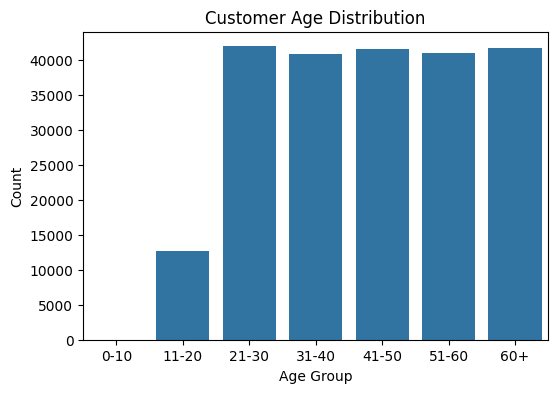

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Age Group', order=age_labels)
plt.title('Customer Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

classification of customers based on Age, Gender. what is Avg amount purchase, product popularity by gender and age groups.

<Figure size 800x400 with 0 Axes>

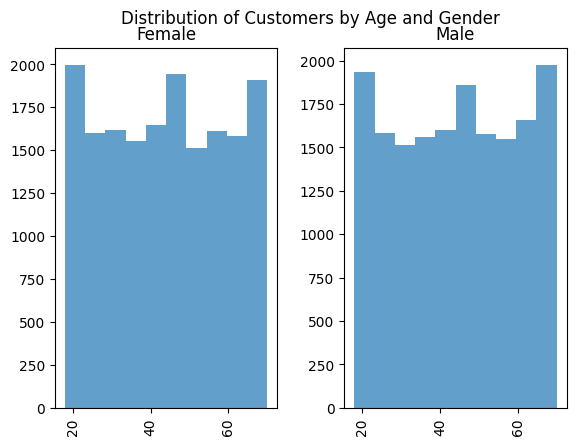

<ipython-input-20-4a0031acd490>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_customers['Age Group'] = pd.cut(unique_customers['Customer Age'], bins=age_bins)


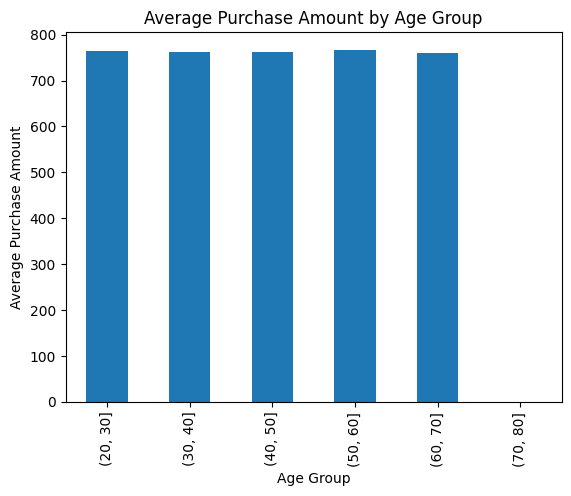

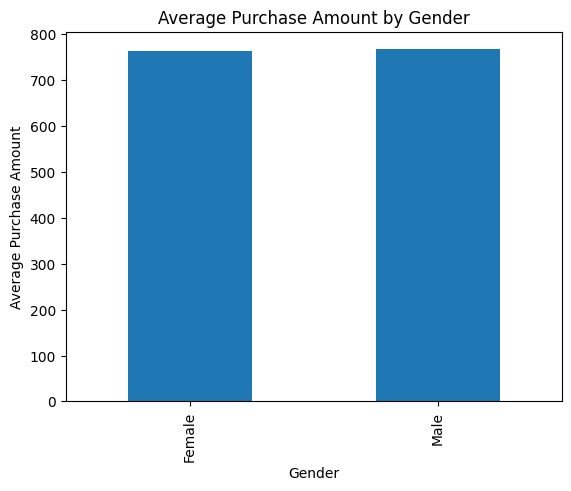

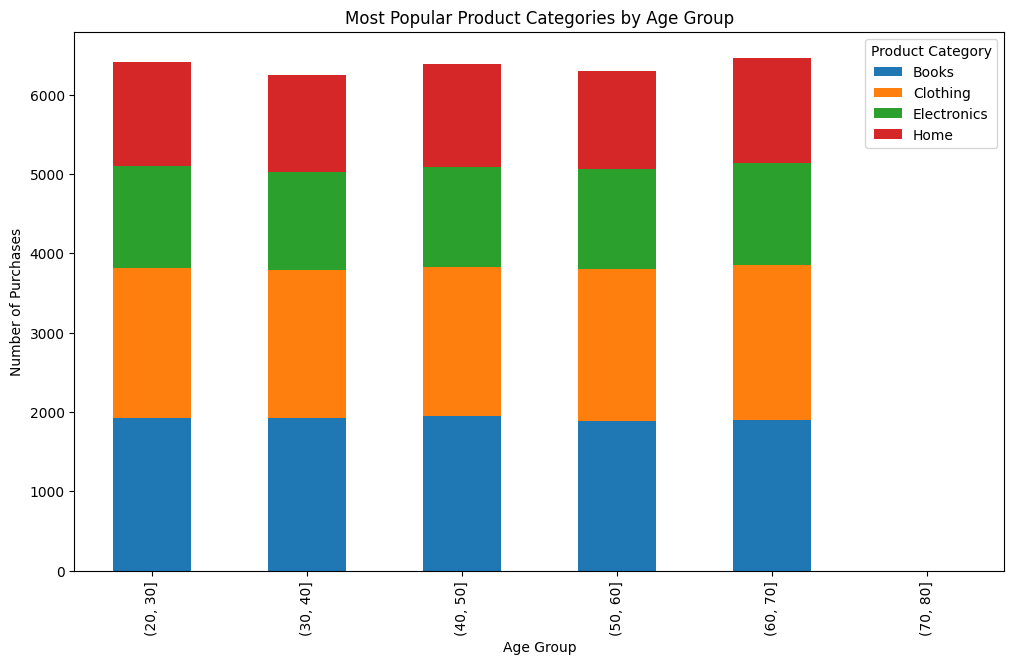

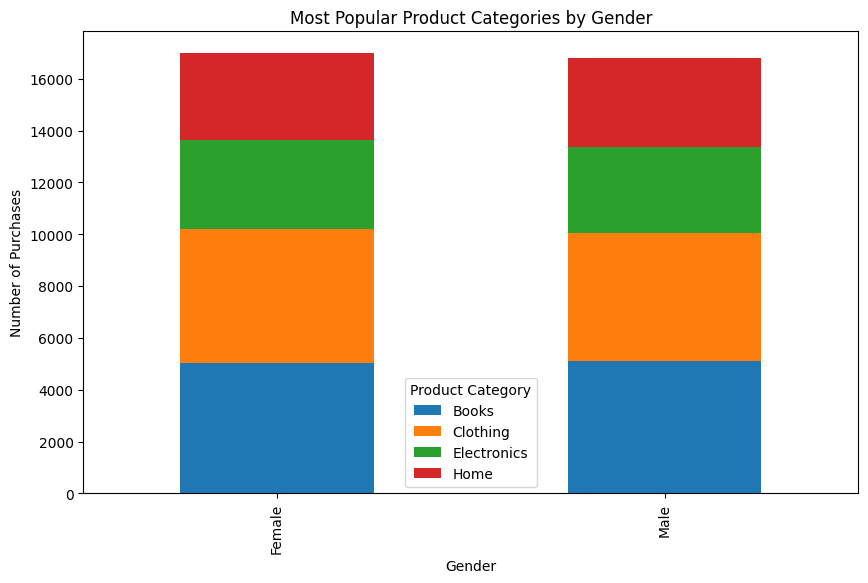

In [20]:
#  # Demographic Analysis:
#  - Distribution of customers by age and gender.
# - Average purchase amount by age group or gender.
#- Most popular product categories among different age groups or genders.

# Drop duplicates based on 'Customer Name' for demographic analysis
unique_customers = df.drop_duplicates(subset='Customer Name')

# Distribution of customers by age and gender
plt.figure(figsize=(8, 4))
unique_customers['Customer Age'].hist(by=unique_customers['Gender'], bins=10, alpha=0.7)
plt.suptitle('Distribution of Customers by Age and Gender')
plt.show()

# Average purchase amount by age group
age_bins = [20, 30, 40, 50, 60, 70, 80]
unique_customers['Age Group'] = pd.cut(unique_customers['Customer Age'], bins=age_bins)
avg_purchase_by_age = unique_customers.groupby('Age Group')['Total Purchase Amount'].mean()
avg_purchase_by_age.plot(kind='bar', title='Average Purchase Amount by Age Group')
plt.ylabel('Average Purchase Amount')
plt.show()

# Average purchase amount by gender
avg_purchase_by_gender = unique_customers.groupby('Gender')['Total Purchase Amount'].mean()
avg_purchase_by_gender.plot(kind='bar', title='Average Purchase Amount by Gender')
plt.ylabel('Average Purchase Amount')
plt.show()

# Most popular product categories among different age groups or genders
# For Age Groups
popular_products_age = unique_customers.groupby(['Age Group', 'Product Category']).size().unstack()
popular_products_age.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Most Popular Product Categories by Age Group')
plt.ylabel('Number of Purchases')
plt.show()

# For Gender
popular_products_gender = unique_customers.groupby(['Gender', 'Product Category']).size().unstack()
popular_products_gender.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Most Popular Product Categories by Gender')
plt.ylabel('Number of Purchases')
plt.show()


Dates of Frequency distribution of purchase, to identify peak shopping times. Quantity of products purchased in a transaction. Most asked  product categories and their average prices. Distribution of total purchase amounts to identify spending patterns.


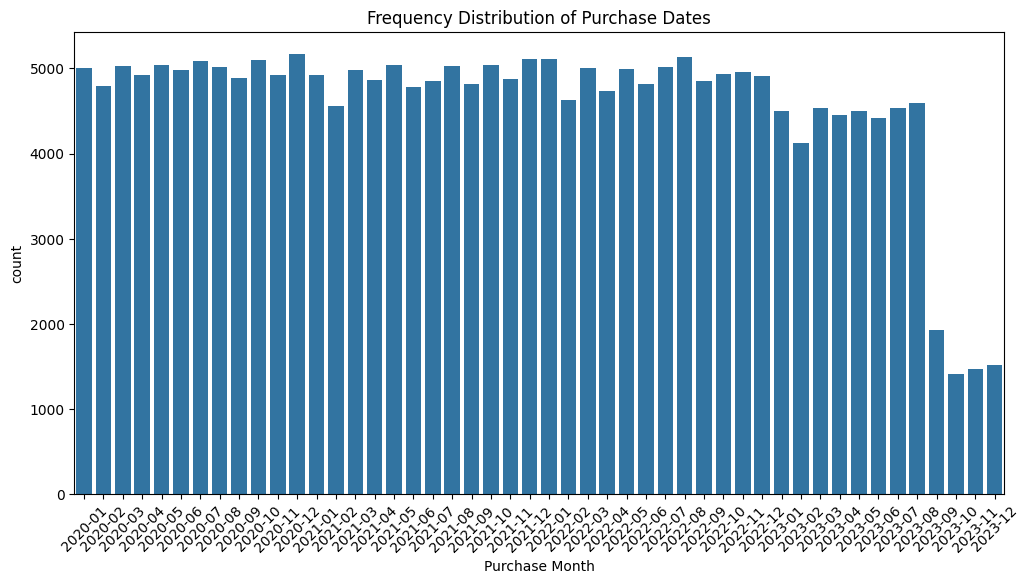

<ipython-input-21-a3cf78d72c8b>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Product Category', y='Quantity', ci=None)


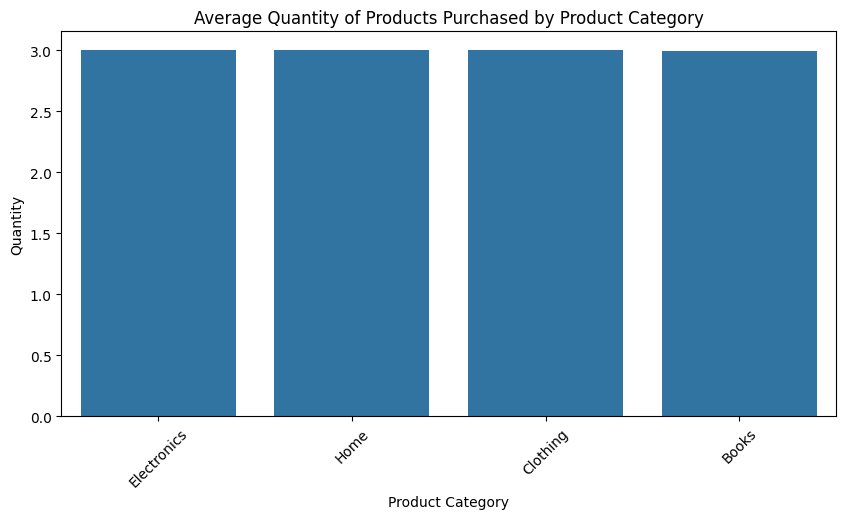

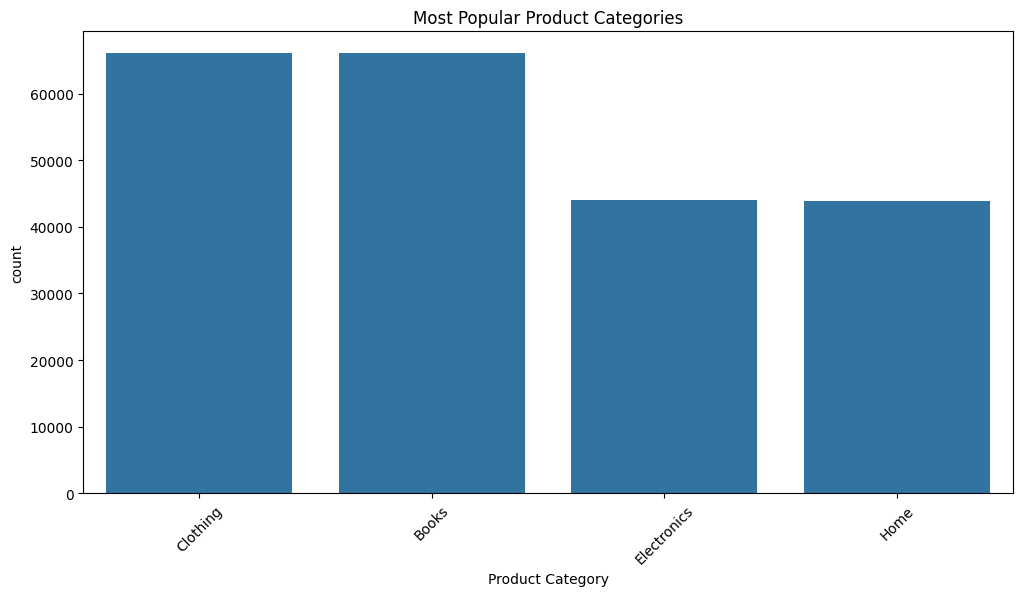

<ipython-input-21-a3cf78d72c8b>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Product Category', y='Product Price', ci=None)


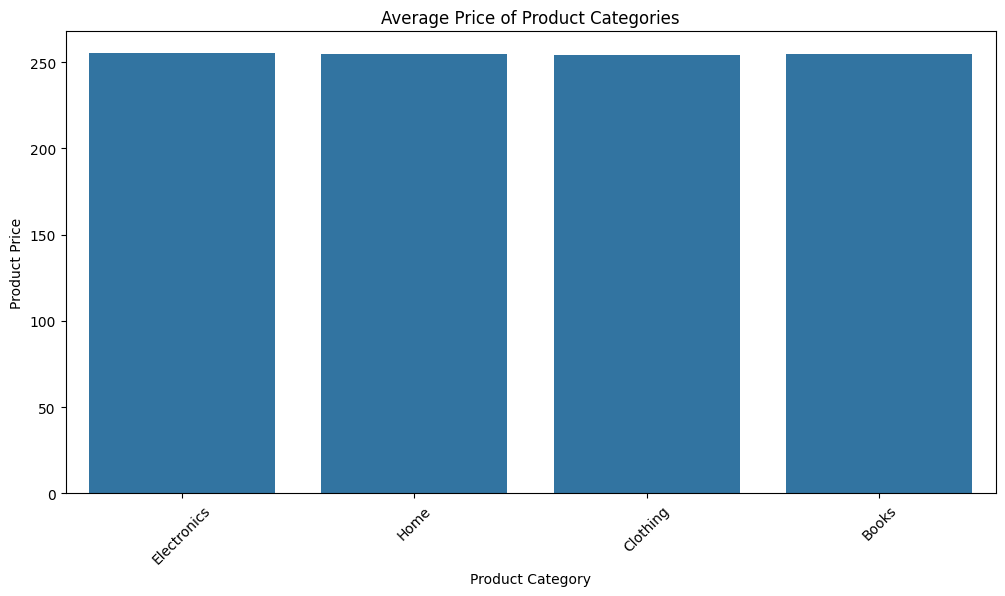

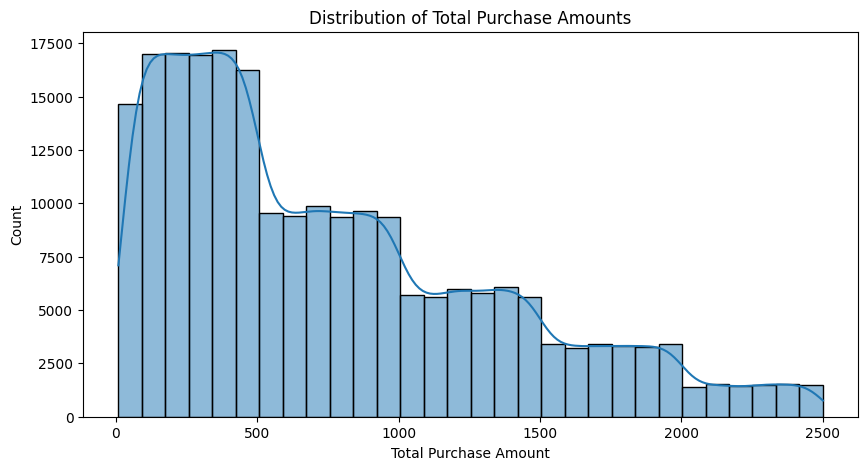

In [21]:
# Frequency distribution of purchase dates
plt.figure(figsize=(12, 6))
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Purchase Month'] = df['Purchase Date'].dt.to_period('M')
sns.countplot(data=df, x='Purchase Month', order=sorted(df['Purchase Month'].unique()))
plt.xticks(rotation=45)
plt.title('Frequency Distribution of Purchase Dates')
plt.show()

# Average quantity of products purchased in a single transaction
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Product Category', y='Quantity', ci=None)
plt.title('Average Quantity of Products Purchased by Product Category')
plt.xticks(rotation=45)
plt.show()

# Most popular product categories and their average prices
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Product Category', order=df['Product Category'].value_counts().index)
plt.title('Most Popular Product Categories')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Product Category', y='Product Price', ci=None)
plt.title('Average Price of Product Categories')
plt.xticks(rotation=45)
plt.show()

# Distribution of total purchase amounts
plt.figure(figsize=(10, 5))
sns.histplot(df['Total Purchase Amount'], bins=30, kde=True)
plt.title('Distribution of Total Purchase Amounts')
plt.show()

In [22]:
gender_distribution = df['Gender'].value_counts()

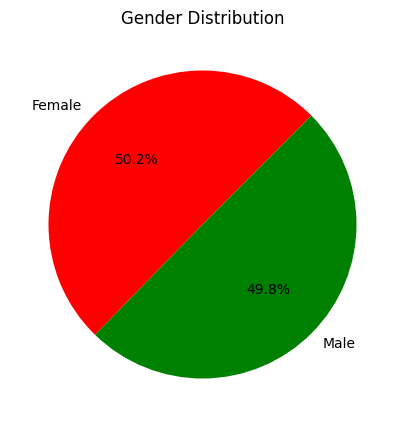

In [24]:
plt.figure(figsize=(5, 5))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=45, colors=['red', 'green'])
plt.title('Gender Distribution')
plt.show()

In [25]:
# Calculate total revenue
total_revenue = df['Total Purchase Amount'].sum()
print(f'Total Revenue: ${total_revenue:.2f}')

Total Revenue: $167968743.00


In [26]:
# Segment customers by total purchase amount
# Define thresholds for segmentation
low_value_threshold = 650
high_value_threshold = 1400

# Create a function to categorize customers based on total purchase amount
def categorize_customers(total_purchase_amount):
    if total_purchase_amount <= low_value_threshold:
        return "Low-Value"
    elif total_purchase_amount <= high_value_threshold:
        return "Mid-Value"
    else:
        return "High-Value"

# Apply the categorization function to create a new column 'Customer Segment'
df['Customer Segment'] = df['Total Purchase Amount'].apply(categorize_customers)

# Print the count of customers in each segment
segment_counts = df['Customer Segment'].value_counts()
segment_counts

Low-Value     115470
Mid-Value      68534
High-Value     35924
Name: Customer Segment, dtype: int64

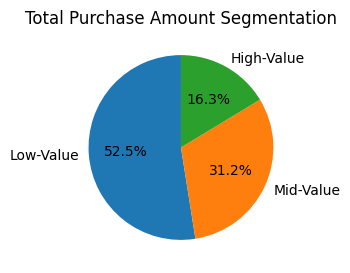

In [27]:
plt.figure(figsize=(4, 3))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Purchase Amount Segmentation')
plt.show()

In [28]:
# Calculate Recency
analysis_date = pd.to_datetime('2023-10-01')
recency = df.groupby('Customer ID')['Purchase Date'].max()
recency = (analysis_date - recency).dt.days  # Calculate recency in days

# Calculate Frequency
frequency = df.groupby('Customer ID').size()

# Calculate Monetary
monetary = df.groupby('Customer ID')['Total Purchase Amount'].sum()

# Create RFM DataFrame
rfm_df = pd.DataFrame({'Recency': recency, 'Frequency': frequency, 'Monetary': monetary})

In [29]:
# Segmentation
# Define segmentation criteria (you can adjust these thresholds)
recency_bins = [0, 30, 90, 180, 1000]
frequency_bins = [1, 2, 5, 10, 50]
monetary_bins = [0, 1000, 2500, 5000, 10000]

rfm_df['Recency_Score'] = pd.cut(rfm_df['Recency'], bins=recency_bins, labels=['High', 'Medium', 'Low', 'Inactive'], right=False)
rfm_df['Frequency_Score'] = pd.cut(rfm_df['Frequency'], bins=frequency_bins, labels=['Low', 'Medium', 'High', 'Very High'], right=False)
rfm_df['Monetary_Score'] = pd.cut(rfm_df['Monetary'], bins=monetary_bins, labels=['Low', 'Medium', 'High', 'Very High'], right=False)

rfm_df

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
Customer ID,,,,,,
1,73,1,845,Medium,Low,Low
4,-66,4,1433,NaN,Medium,Medium
5,186,8,7881,Inactive,High,Very High
6,389,6,2024,Inactive,High,Medium
8,25,6,3894,High,High,High
...,...,...,...,...,...,...
49994,164,5,4631,Low,High,High
49996,286,4,3150,Inactive,Medium,High
49997,64,8,7948,Medium,High,Very High


<Axes: title={'center': 'Monetary'}, xlabel='Recency_Score'>

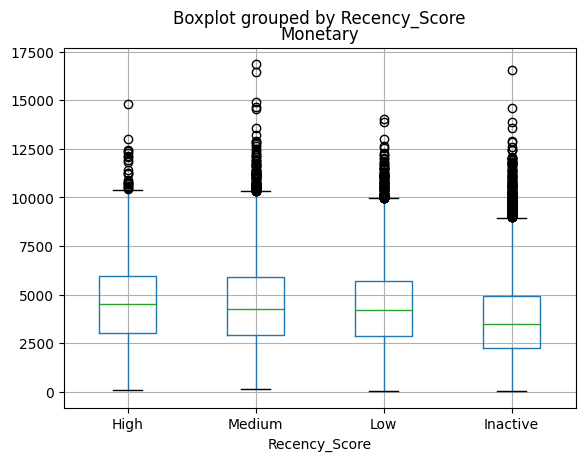

In [30]:
# Monetary Value vs Recency

rfm_df.boxplot(column='Monetary', by='Recency_Score')

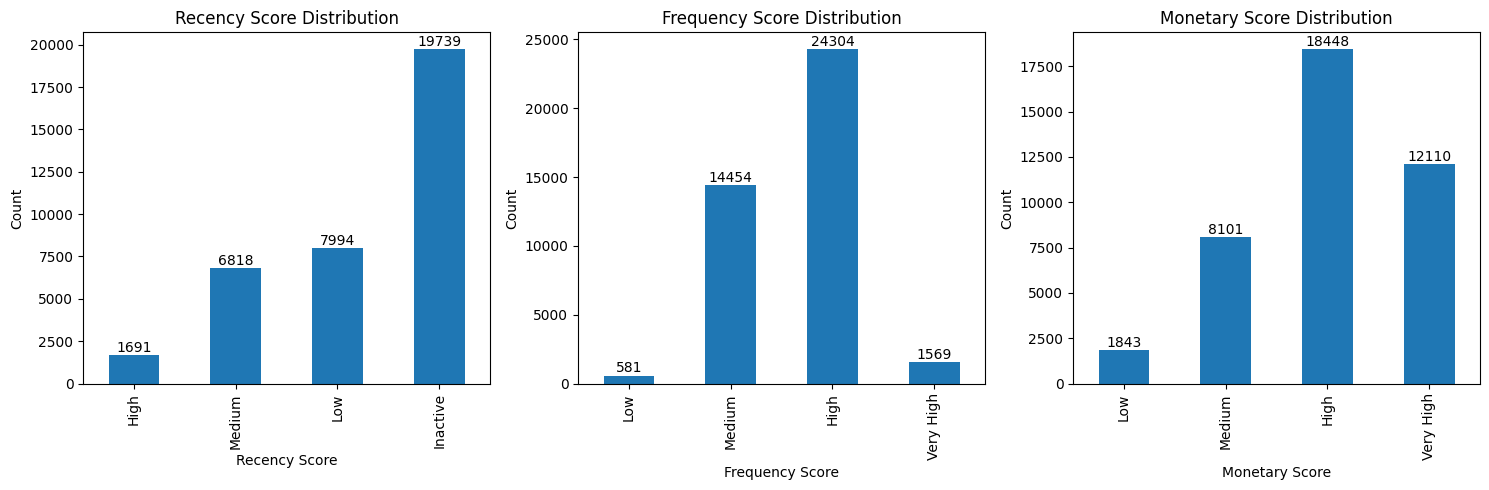

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Visualize the Recency Score distribution
recency_counts = rfm_df['Recency_Score'].value_counts().sort_index()
recency_counts.plot(kind='bar', ax=axes[0])
axes[0].set_title('Recency Score Distribution')
axes[0].set_xlabel('Recency Score')
axes[0].set_ylabel('Count')

for i, v in enumerate(recency_counts):
    axes[0].text(i, v + 10, str(v), ha='center', va='bottom')

# Visualize the Frequency Score distribution
frequency_counts = rfm_df['Frequency_Score'].value_counts().sort_index()
frequency_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('Frequency Score Distribution')
axes[1].set_xlabel('Frequency Score')
axes[1].set_ylabel('Count')

for i, v in enumerate(frequency_counts):
    axes[1].text(i, v + 10, str(v), ha='center', va='bottom')

# Visualize the Monetary Score distribution
monetary_counts = rfm_df['Monetary_Score'].value_counts().sort_index()
monetary_counts.plot(kind='bar', ax=axes[2])
axes[2].set_title('Monetary Score Distribution')
axes[2].set_xlabel('Monetary Score')
axes[2].set_ylabel('Count')

for i, v in enumerate(monetary_counts):
    axes[2].text(i, v + 10, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [32]:
# Calculate product category distribution
product_category_distribution = df['Product Category'].value_counts().reset_index()
product_category_distribution.columns = ['Product Category', 'Count']

# Sort the data by count in descending order
product_category_distribution = product_category_distribution.sort_values(by='Count', ascending=False)
product_category_distribution

,Product Category,Count
0,Clothing,66035
1,Books,66033
2,Electronics,44045
3,Home,43815


<Axes: xlabel='Product Category', ylabel='Count'>

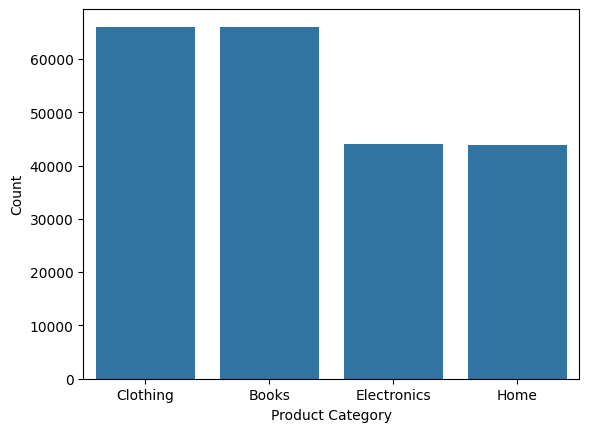

In [33]:
# Product Category Distribution by Count

sns.barplot(x="Product Category", y="Count", data=product_category_distribution)

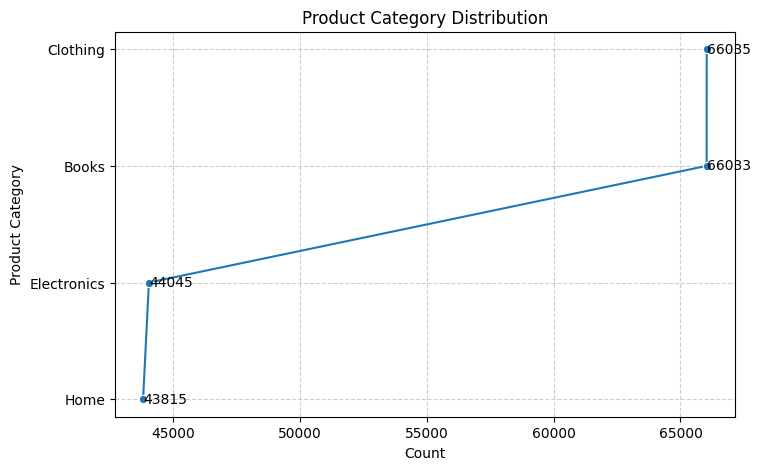

In [36]:
# Create a line chart with count points
plt.figure(figsize=(8, 5))
sns.lineplot(data=product_category_distribution, x='Count', y='Product Category', marker='o')
plt.title('Product Category Distribution')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.grid(True, linestyle='--', alpha=0.6)

# Add count annotations on the lines
for index, row in product_category_distribution.iterrows():
    plt.text(row['Count'] + 5, index, f'{row["Count"]}', va='center', fontsize=10)

plt.show()

In [37]:
# Calculate total sales by product category
product_category_sales = df.groupby('Product Category')['Total Purchase Amount'].sum().reset_index()
product_category_sales = product_category_sales.sort_values(by='Total Purchase Amount', ascending=False)
product_category_sales

,Product Category,Total Purchase Amount
1,Clothing,50380478
0,Books,50272262
2,Electronics,33773253
3,Home,33542750


<Axes: xlabel='Product Category', ylabel='Total Purchase Amount'>

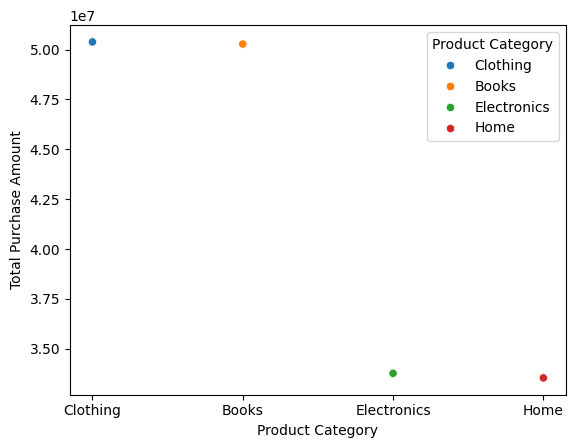

In [38]:
# Correlation between Total Purchase Amount and Product Category

sns.scatterplot(x='Product Category', y='Total Purchase Amount', data=product_category_sales, hue='Product Category')

<ipython-input-41-e6d6dc7c680e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=product_category_sales, x='Total Purchase Amount', y='Product Category', palette='viridis', errcolor=None, width=0.5)


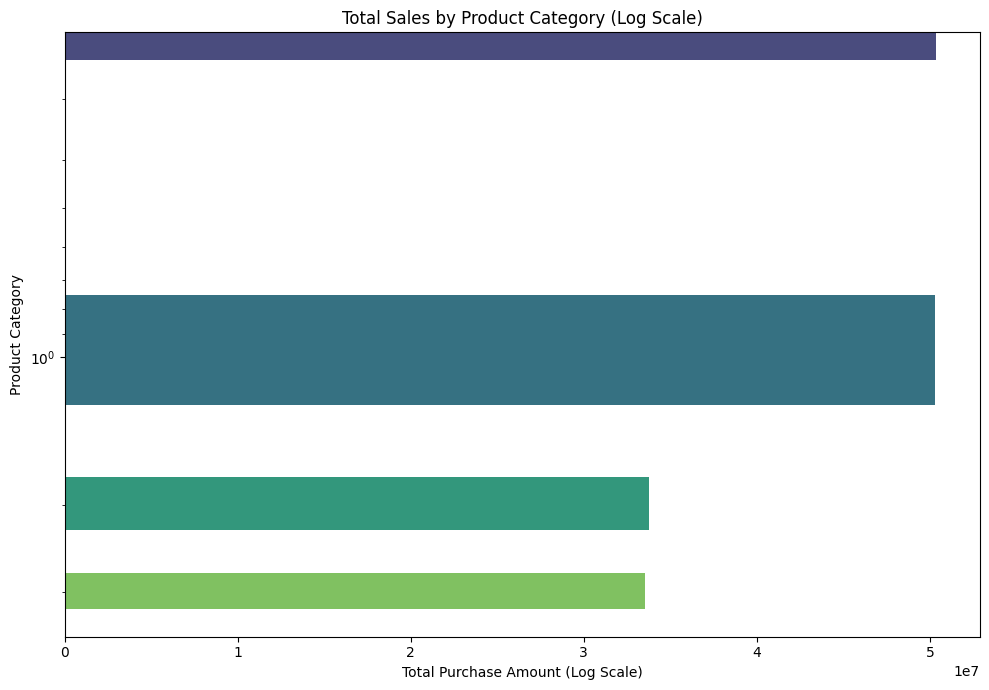

In [41]:
# Create a vertical barplot for total sales by product category with adjusted bar width and log scale on the y-axis
plt.figure(figsize=(10,7))
ax = sns.barplot(data=product_category_sales, x='Total Purchase Amount', y='Product Category', palette='viridis', errcolor=None, width=0.5)
plt.title('Total Sales by Product Category (Log Scale)')
plt.xlabel('Total Purchase Amount (Log Scale)')
plt.ylabel('Product Category')

# Set a log scale on the y-axis
ax.set_yscale('log')

plt.xticks()
plt.tight_layout()
plt.show()

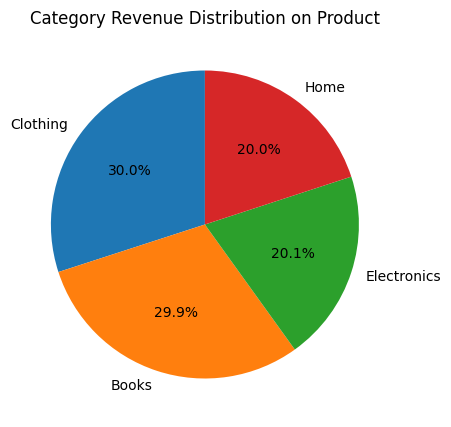

In [43]:
# Pie chart creation
plt.figure(figsize=(5, 5))
plt.pie(product_category_sales['Total Purchase Amount'], labels=product_category_sales['Product Category'],autopct='%1.1f%%',  startangle=90)

# Title representing a pie chart
plt.title('Category Revenue Distribution on Product')

# Chart showing
plt.show()

In [44]:
# return rate calclation
return_rate = df['Returns'].mean()
print(f'Return Rate: {return_rate:.2%}')

Return Rate: 40.34%


In [45]:
# Total lost revenue due to returns
total_lost_revenue = df[df['Returns'] == 1]['Total Purchase Amount'].sum()
print(f'Total Lost Revenue due to Returns: ${total_lost_revenue:.2f}')

Total Lost Revenue due to Returns: $67631521.00


In [46]:
# data by return status
returned_data = df[df['Returns'] == 1]
not_returned_data = df[df['Returns'] == 0]

# return rates by product category
return_rate_by_category = returned_data['Product Category'].value_counts() / df['Product Category'].value_counts()
return_rate_by_category

Books          0.403692
Clothing       0.402408
Electronics    0.404541
Home           0.403469
Name: Product Category, dtype: float64

In [47]:
return_rate_by_customer_group = (returned_data['Customer Segment'].value_counts()/df['Customer Segment'].value_counts(normalize=True))
return_rate_by_customer_group

Low-Value     88931.135152
Mid-Value     88710.561648
High-Value    88096.089522
Name: Customer Segment, dtype: float64

In [48]:
return_rate_by_customer_group = returned_data['Customer Segment'].value_counts() / df['Customer Segment'].value_counts()
return_rate_by_customer_group

Low-Value     0.404365
Mid-Value     0.403362
High-Value    0.400568
Name: Customer Segment, dtype: float64

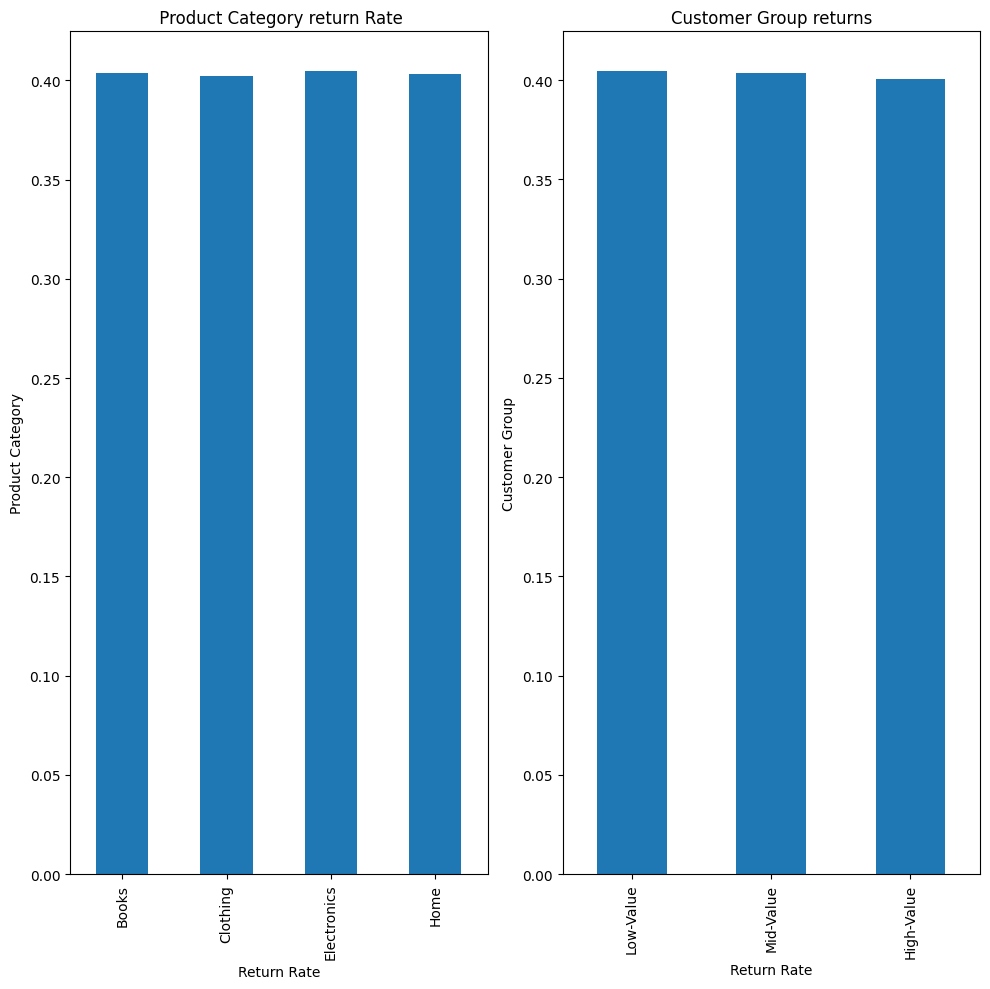

In [53]:
# Set the figure size
plt.figure(figsize=(10, 10))

# Plot return rates by product category
plt.subplot(1, 2, 1)
return_rate_by_category.plot(kind='bar')
plt.title(' Product Category return Rate')
plt.xlabel('Return Rate')
plt.ylabel('Product Category')

# Plot return rates by customer group
plt.subplot(1, 2, 2)
return_rate_by_customer_group.plot(kind='bar')
plt.title('Customer Group returns')
plt.xlabel('Return Rate')
plt.ylabel('Customer Group')

# Show the plots
plt.tight_layout()
plt.show()

In [54]:
# churn rate Calculation
churn_rate = (df['Churn'].sum() / len(df['Churn'])) * 100
print(f'Churn Rate: {churn_rate:.2f}%')

Churn Rate: 19.96%


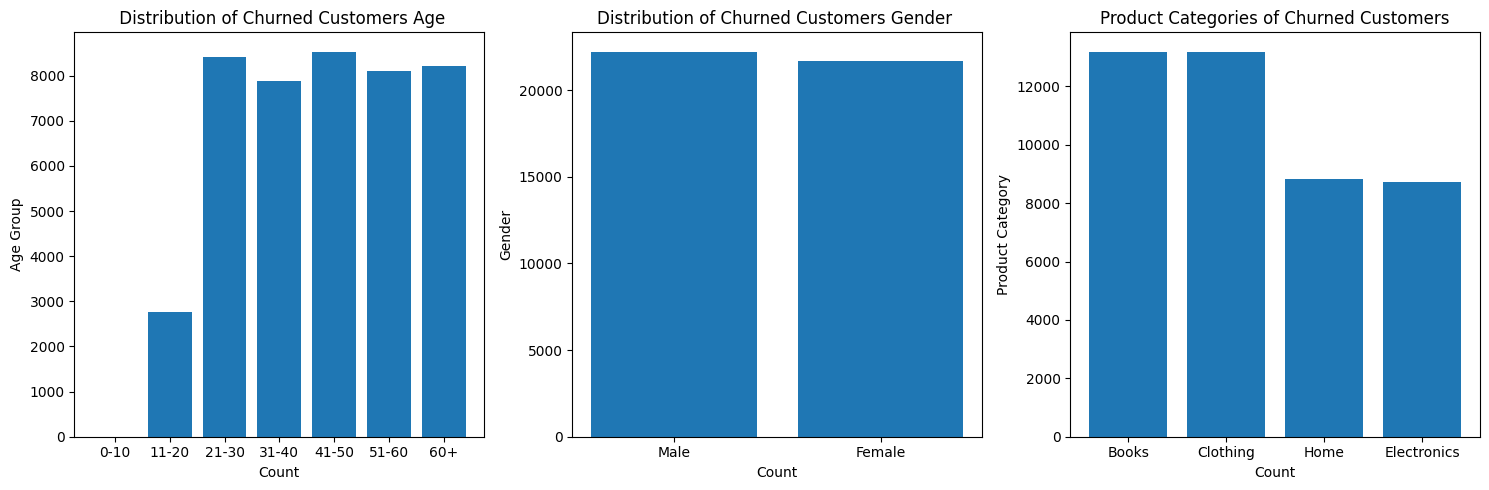

In [55]:
# Filter churned customers (assume values 0 for retained, 1 for churned)
churned_customers = df[df['Churn'] == 1]

# Analyze common characteristics of churned customers
churned_customer_info = churned_customers[['Customer ID', 'Total Purchase Amount', 'Product Category', 'Customer Age', 'Gender']]

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Customer Age Distribution with age  Plotting
churned_age_bins = pd.cut(churned_customer_info['Customer Age'], bins=age_ranges, labels=age_labels)
age_counts = churned_age_bins.value_counts().reindex(age_labels, fill_value=0)
axes[0].bar(age_counts.index, age_counts.values)
axes[0].set_title(' Distribution of Churned Customers Age')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Age Group')

# Gender Distribution Plotting
churned_gender_counts = churned_customer_info['Gender'].value_counts()
axes[1].bar(churned_gender_counts.index, churned_gender_counts.values)
axes[1].set_title('Distribution of Churned Customers Gender ')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Gender')

# Product Category Distribution plotting
churned_product_category_counts = churned_customer_info['Product Category'].value_counts()
axes[2].bar(churned_product_category_counts.index, churned_product_category_counts.values)
axes[2].set_title('Product Categories of Churned Customers')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Product Category')

plt.tight_layout()
plt.show()

In [56]:
# Cumulative Lifetime Value with retention rate and average purchase value calculation
average_purchase_value = df['Total Purchase Amount'].mean()
retention_rate = 1 - (churn_rate / 100)
clv = average_purchase_value / (1 - retention_rate)
print(f'Customer Lifetime Value(CLV): ${clv:.2f}')

Customer Lifetime Value(CLV): $3825.91


In [57]:
# Average purchase value for each segment Calculate
average_purchase_value_by_segment = df.groupby('Customer Segment')['Total Purchase Amount'].mean()

# Calculate retention rate for the entire dataset
retention_rate = 1 - (churn_rate / 100)  # Assuming you have a churn rate value

# Calculate CLV for each segment
clv_by_segment = {}
for segment, avg_purchase_value in average_purchase_value_by_segment.items():
    clv = avg_purchase_value / (1 - retention_rate)
    clv_by_segment[segment] = clv

# Identify high-value segments
high_value_segments = [segment for segment, clv in clv_by_segment.items() if clv >= 1000]

# Print CLV by segment
print("CLV by Segment:")
for segment, clv in clv_by_segment.items():
    print(f"{segment}: ${clv:.2f}")

CLV by Segment:
High-Value: $9101.82
Low-Value: $1540.17
Mid-Value: $4911.53


In [58]:
# Print high-value segments
print("High-Value Segments:")
print(high_value_segments)

High-Value Segments:
['High-Value', 'Low-Value', 'Mid-Value']


In [59]:
# Analyze payment methods
payment_method_counts = df['Payment Method'].value_counts()
print(payment_method_counts)

Credit Card    88391
PayPal         65822
Cash           43891
Crypto         21823
Name: Payment Method, dtype: int64


In [60]:
import scipy.stats as stats

# Create a contingency table for payment method and return status
contingency_table = pd.crosstab(df['Payment Method'], df['Returns'])

# Perform the Chi-squared test for independence
chi2, p, _, _ = stats.chi2_contingency(contingency_table)
print(f'Chi-squared value: {chi2}')
print(f'p-value: {p}')

# If p-value is less than your chosen significance level (e.g., 0.05), you can reject the null hypothesis
if p < 0.05:
    print("Payment method and return status are related.")
else:
    print("Payment method and return status are not significantly related.")

# Compare the means of average purchase values for each payment method
average_purchase_by_payment = df.groupby('Payment Method')['Total Purchase Amount'].mean()
print(average_purchase_by_payment)

Chi-squared value: 7.052087463375311
p-value: 0.0702559688405595
Payment method and return status are not significantly related.
Payment Method
Cash           761.964708
Credit Card    764.693781
Crypto         765.943500
PayPal         762.921956
Name: Total Purchase Amount, dtype: float64


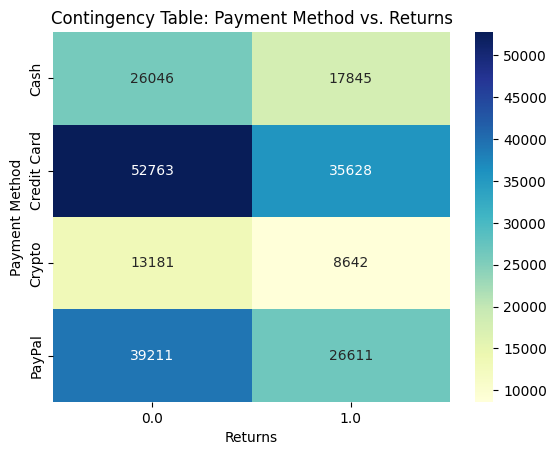

In [61]:
# Create a bar plot
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Contingency Table: Payment Method vs. Returns')
plt.xlabel('Returns')
plt.ylabel('Payment Method')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.f

Accuracy: 0.80032


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89     40016
           1       0.00      0.00      0.00      9984

    accuracy                           0.80     50000
   macro avg       0.40      0.50      0.44     50000
weighted avg       0.64      0.80      0.71     50000



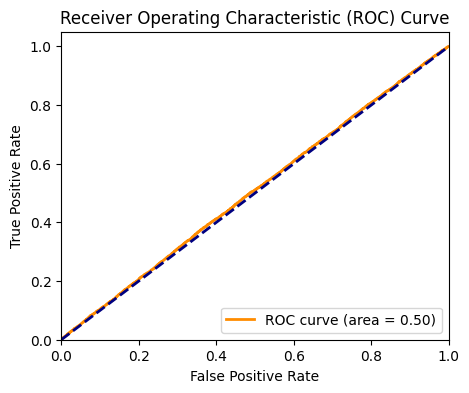

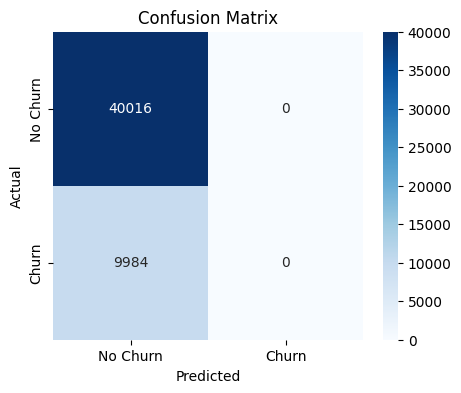

In [90]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, auc, confusion_matrix

df = pd.read_csv("ecommerce_customer_data_custom_ratios.csv")

# Drop non-numeric columns for simplicity
df = df.drop(columns=['Customer ID', 'Customer Name', 'Purchase Date'])

# Impute missing values
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical column
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:  # Numerical column
        df[column].fillna(df[column].mean(), inplace=True)
label_encoders = {}  # Initialize an empty dictionary to store LabelEncoder objects
# Identify columns with dtype 'object' and encode them
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Split data into features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

# Compute AUC
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print()
# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [91]:

# getting data from dataset
df = pd.read_csv("ecommerce_customer_data_custom_ratios.csv")

# Convert the data into a one-hot encoded format
container = df.groupby(['Customer ID', 'Product Category'])['Quantity'].sum().unstack().fillna(0)

# Convert quantity values to binary (1 if purchased, 0 if not)
container[container > 0] = 1

# Perform Apriori algorithm to find frequent item sets
frequent_itemsets = apriori(container, min_support=0.05, use_colnames=True)

# Generate association rules
association_rules_df = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Filter and sort the rules for recommendation
recommended_rules = association_rules_df[association_rules_df['lift'] > 1.0].sort_values(by='lift', ascending=False)

# Display the recommended rules
print(recommended_rules[['antecedents', 'consequents', 'support', 'lift']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


               antecedents              consequents   support      lift
1        (Books, Clothing)      (Home, Electronics)  0.244982  1.000702
2      (Home, Electronics)        (Books, Clothing)  0.244982  1.000702
0  (Books, Clothing, Home)            (Electronics)  0.244982  1.000277
3            (Electronics)  (Books, Clothing, Home)  0.244982  1.000277


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated

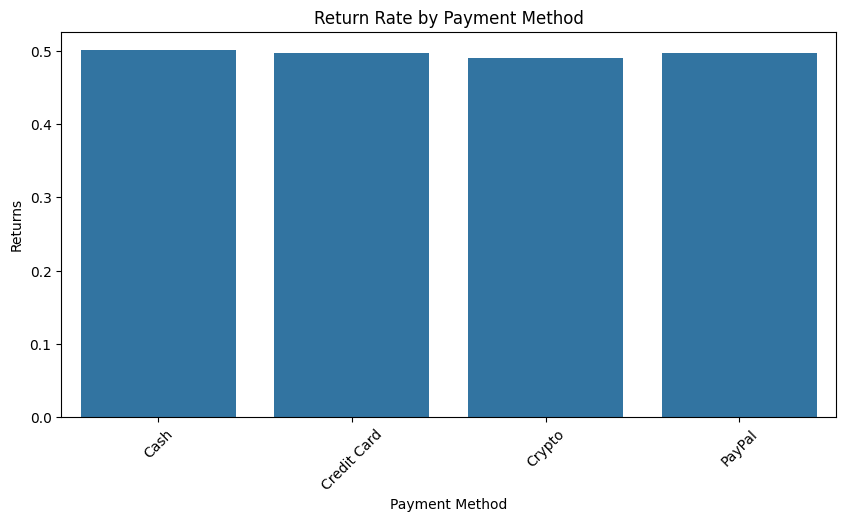

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (D

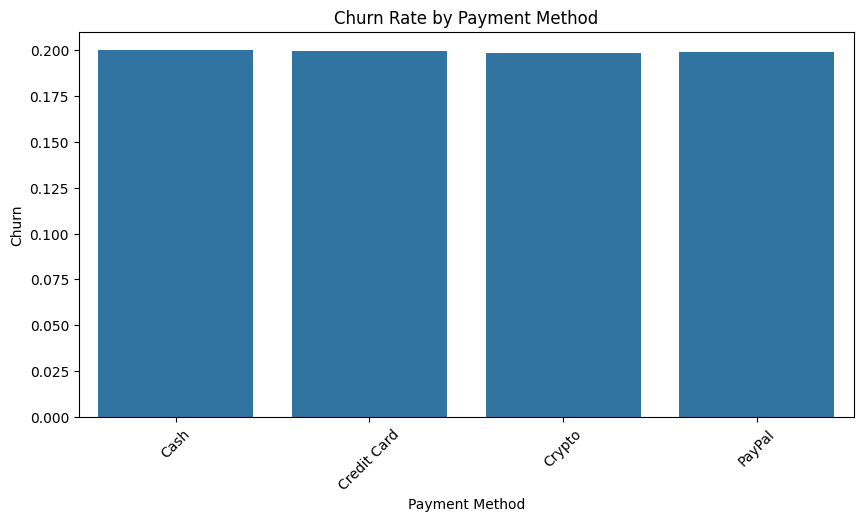

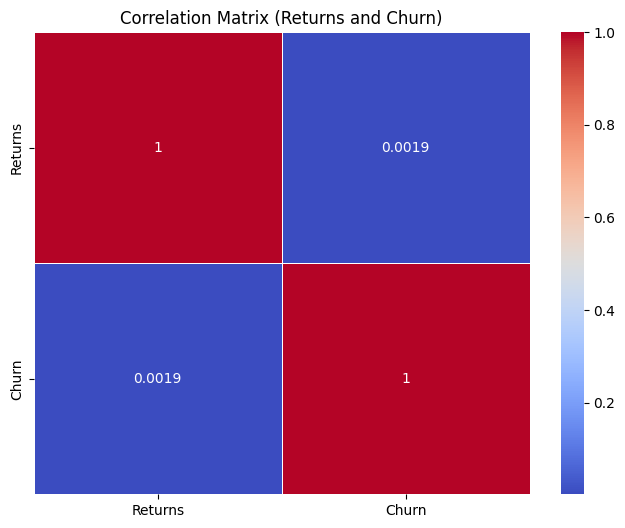

In [86]:
# return rate for each payment method
return_rate = df.groupby('Payment Method')['Returns'].mean().reset_index()

# churn rate for each payment method
churn_rate = df.groupby('Payment Method')['Churn'].mean().reset_index()

# Create a correlation matrix between payment method, returns, and churn
correlation_matrix = df[['Returns', 'Churn']].corr()

# Visualize the return rate by payment method
plt.figure(figsize=(10, 5))
sns.barplot(x='Payment Method', y='Returns', data=return_rate)
plt.title('Return Rate by Payment Method')
plt.xticks(rotation=45)
plt.show()

# Visualize the churn rate by payment method
plt.figure(figsize=(10, 5))
sns.barplot(x='Payment Method', y='Churn', data=churn_rate)
plt.title('Churn Rate by Payment Method')
plt.xticks(rotation=45)
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix (Returns and Churn)')
plt.show()

In [84]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.80032


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
